# Blob Segmentation

In this notebook, we will perform blob segmentation on the provided image `blobs.png`. We will use popular Python libraries for scientific image analysis to load, process, and segment the blobs.

## Step 1: Load the image

First, we will load the image using `skimage.io.imread`.

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
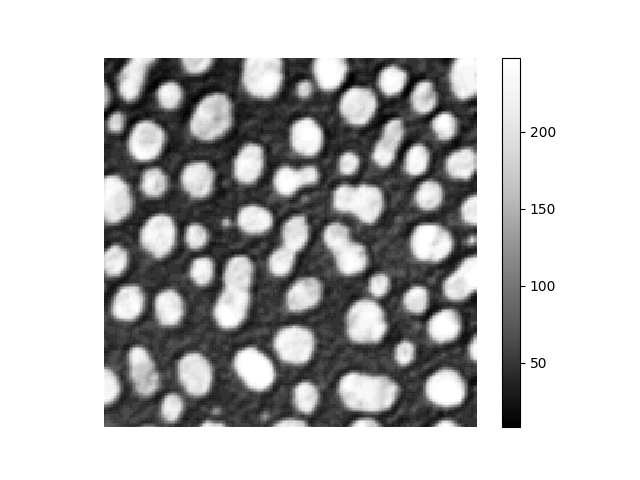
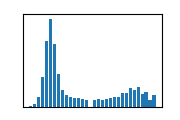

In [1]:
from skimage.io import imread
import stackview

# Load the image
image = imread('../data/blobs.png')

# Display the image
stackview.insight(image)

## Step 2: Apply a Gaussian blur to the image

We apply a Gaussian blur to smooth the image and reduce noise.

In [2]:
import napari_simpleitk_image_processing as nsitk

# Apply Gaussian blur
smoothed_image = nsitk.gaussian_blur(image, variance_x=2.0, variance_y=2.0)

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:221: UserWarning: Error in monkey patching napari. Please let @haesleinleinhuepf know at
https://github.com/haesleinhuepf/napari-tools-menu/issues
  warnings.warn("Error in monkey patching napari. Please let @haesleinleinhuepf know at\nhttps://github.com/haesleinhuepf/napari-tools-menu/issues")
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_skimage_regionprops/_table.py:7: UserWarning: No Qt bindings could be found
  warnings.warn(str(e))


## Step 3: Segment the image using Otsu's threshold

We use Otsu's thresholding method to create a binary image with the blobs as foreground.

In [3]:
# Segment the image
binary_image = nsitk.threshold_otsu(smoothed_image)

## Step 4: Label the blobs

Label the connected components in the binary image.

In [4]:
# Label the blobs
label_image = nsitk.connected_component_labeling(binary_image)

## Step 5: Display the results

We will use `stackview` to visualize the labeled blobs.



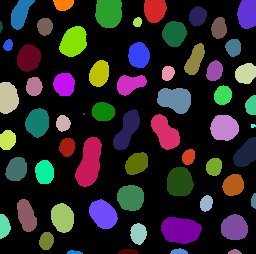

In [5]:
# Visualize the original and labeled images
stackview.animate_curtain(image, label_image)

## Step 6: Save the labeled image

Save the labeled image for further analysis or presentation.

In [6]:
from skimage.io import imsave

# Save labeled image
imsave('../data/labeled_blobs.png', label_image.astype(int))

/tmp/ipykernel_2185/525328261.py:4: UserWarning: ../data/labeled_blobs.png is a low contrast image
  imsave('../data/labeled_blobs.png', label_image.astype(int))


TypeError: Cannot handle this data type: (1, 1), <i8